In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
def get_connected_components(image):
  ret, thresh = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  connectivity = 4  
  return cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)

In [ ]:
def split_components(image):
  count = 0
  image_out = image
  while  not (np.all((image == 0))):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
    image = cv2.erode(image,kernel,iterations = 1)
    # cv2_imshow(erosion)
    output = get_connected_components(image)
    # print(output[0])
    if count < output[0]:
      count = output[0]
      image_out = image
  return count, image_out

In [ ]:
def thresh_hold_area(area_max, area_min, image):
  output = get_connected_components(image)
  img_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
  stats = output[2]
  labels = output[1]
  for i in range(len(stats)):
    if stats[i, 4] < area_max or stats[i, 4] > area_min:
      img_bgr[labels==i]=0
      # aaaaaa[filtered_labels==i]=0
  return img_bgr[:,:,0]

In [ ]:
def is_circle(image, threshold):
  (h, w) = image.shape[:2]
  (cX, cY) = (w // 2, h // 2)
  M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
  rotated = cv2.warpAffine(image, M, (w, h))
  # cv2_imshow(rotated)
  thresh = 127
  rotated_binary = cv2.threshold(rotated, thresh, 255, cv2.THRESH_BINARY)[1]
  # rotated_binary
  c1 = get_connected_components( image)
  c2 = get_connected_components(rotated_binary)
  res = c2[2][1,4]/(c2[2][1,2] * c2[2][1,3]) - c1[2][1,4]/(c1[2][1,2] * c1[2][1,3])
  if res<0:
    res *= -1
  # print(res)
  if res<threshold:
    return True
  else:
    return False

In [ ]:
def draw_circles(image, threshold):
  output = get_connected_components(image)
  stats = output[2]
  labels = output[1]
  centroids = output[3]
  img_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
  count=0
  for i in range(len(stats)):
    if i == 0:
      continue
    # cv2_imshow(image[stats[i, 1]:stats[i, 1]+stats[i, 3], stats[i, 0]:stats[i, 0]+stats[i, 2]])
    # cv2_imshow(image[stats[i, 0]:stats[i, 0]+stats[i, 2], stats[i, 1]:stats[i, 1]+stats[i, 3]])

    vvv = is_circle(image[stats[i, 1]:stats[i, 1]+stats[i, 3], stats[i, 0]:stats[i, 0]+stats[i, 2]], threshold)
    if vvv:
      img_bgr = cv2.circle(img_bgr, (int(centroids[i, 0]), int(centroids[i,1])), max(int(stats[i, 2]/2), int(stats[i, 3]/2)), (50,128,50), 2)
      count +=1
  return img_bgr, count

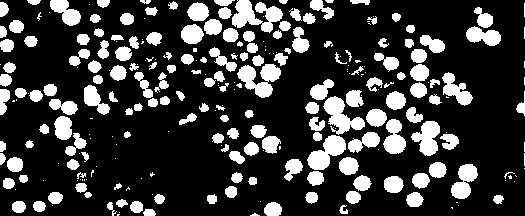

In [ ]:
# main



src = cv2.imread('random_forest_result.bmp', 0)
input = src.copy()
contour, _ = cv2.findContours(src,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contour:
  cv2.drawContours(src,[cnt],0,255,-1)
cv2_imshow(src)
output_image = np.zeros(src.shape)

aa = thresh_hold_area(10, 11, src)

# cv2_imshow(aa)
# print(aa)
# output_image = cv2.bitwise_or(output_image, aa/255)
output_image += aa

# output_image +=  aa

for i in range(12,1000):
  bb = thresh_hold_area(i, i+1, src)

  bb, imag = split_components(bb)
  # output_image = cv2.bitwise_or(output_image, imag/255)
  output_image += imag
# cv2_imshow(output_image)
# cv2_imshow(output_image)
# print(bb)

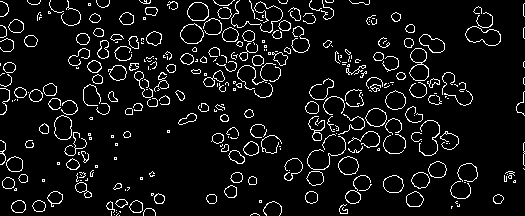

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in ushort_scalars


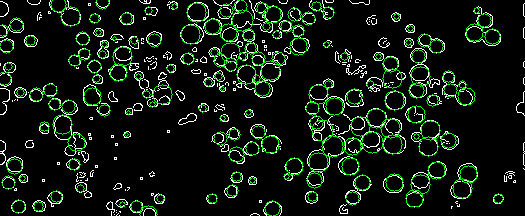

163


In [ ]:

src = cv2.imread('random_forest_result.bmp', 0)
input = src.copy()
contour, _ = cv2.findContours(src,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contour:
  cv2.drawContours(src,[cnt],0,255,-1)
# cv2_imshow(src)
# output_image = np.zeros(src.shape)
# cv2_imshow(output_image)
edges = cv2.Canny(src,100,200)
cimg = cv2.cvtColor(edges,cv2.COLOR_GRAY2BGR)
cv2_imshow(edges)

# circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,10,50,
                            # param1=50,param2=30,minRadius=0,maxRadius=0)

circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, minDist=10,
                    param1=20, param2=10, minRadius=0, maxRadius=12)
circles = np.uint16(np.around(circles))
count = 0

true_circles = []
true_circles.append(circles[0][0])

for i in range(circles[0].shape[0]):
  flag = True
  for j in range(circles[0].shape[0]):
    if i == j:
      continue
    # print(i[0] , j[0], i[1] , j[1])
    result= ((((circles[0, i, 0] - circles[0, j, 0] )**2) + ((circles[0, i, 1] - circles[0, j, 1] )**2) )**0.5)
    # print(result)
    if result < 10:
      flag=False
    
    
  if flag:
    true_circles.append(circles[0, i])
      # break


count =0
for i in true_circles:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),1)
    # draw the center of the circle
    # cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    count += 1
cv2_imshow(cimg)
print(count)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [ ]:
circles[0][0]
# true_circles[0][0]

array([196,  12,  10], dtype=uint16)

In [ ]:
outttt = get_connected_components(output_image.astype(np.uint8))
# output_image.shape
output_image = output_image.astype(np.uint8)

abcd = thresh_hold_area(10, 1000, output_image)

# cv2_imshow(output_image)
threshold = 0.15
final_image, count = draw_circles(abcd, threshold)
cv2_imshow(input)
print()
cv2_imshow(final_image)
print('threshold: ' + str(threshold))
print("count: " + str(count))

NameError: ignored

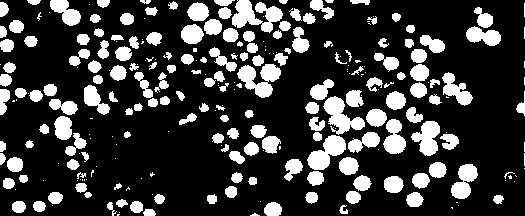

In [ ]:
src = cv2.imread('random_forest_result.bmp', 0)
aa = thresh_hold_area(100, 101, src)


(216, 525)

In [ ]:
image = aa[162:168, 68:78]
cv2_imshow(image)
# aa.shape

In [ ]:
is_circle(image, 0.1)

0.2833333333333333


False

In [ ]:
|(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
cv2_imshow(rotated)


In [ ]:
thresh = 127
rotated_binary = cv2.threshold(rotated, thresh, 255, cv2.THRESH_BINARY)[1]
rotated_binary

array([[  0,   0,   0,   0, 255, 255, 255, 255, 255,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0, 255, 255, 255, 255, 255, 255, 255, 255,   0],
       [255, 255, 255, 255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255, 255, 255, 255, 255,   0,   0,   0]], dtype=uint8)

In [ ]:
c1 = get_connected_components( image)
c2 = get_connected_components(rotated_binary)

In [ ]:
c1[2][1,4]/(c1[2][1,2] * c1[2][1,3]) 

1.0

In [ ]:
c2[2][1,4]/(c2[2][1,2] * c2[2][1,3]) 

0.7166666666666667

In [ ]:
res = c2[2][1,4]/(c2[2][1,2] * c2[2][1,3]) - c1[2][1,4]/(c1[2][1,2] * c1[2][1,3])
if res<0:
  res *= -1
res

0.2833333333333333

In [ ]:
cv2_imshow(image - rotated)

In [ ]:
image

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255]], dtype=uint8)

In [ ]:
# rotated
thresh = 127
rotated_binary = cv2.threshold(rotated, thresh, 255, cv2.THRESH_BINARY)[1]
rotated_binary

array([[  0,   0,   0,   0, 255, 255, 255, 255, 255,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0, 255, 255, 255, 255, 255, 255, 255, 255,   0],
       [255, 255, 255, 255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255, 255, 255, 255, 255,   0,   0,   0]], dtype=uint8)

In [ ]:

result = cv2.bitwise_xor(image, rotated_binary)

# result = image - rotated_binary
result

array([[255, 255, 255, 255,   0,   0,   0,   0,   0, 255],
       [255, 255, 255,   0,   0,   0,   0,   0,   0,   0],
       [255, 255,   0,   0,   0,   0,   0,   0,   0,   0],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0, 255, 255, 255]], dtype=uint8)

In [ ]:
cv2_imshow(result)

In [ ]:
np.sum(result)/(result.shape[0]*result.shape[1])

72.25